C:\Users\1\AppData\Local\Temp\ipykernel_20376\2461397346.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_species = df.groupby('species').apply(lambda x: x.drop(columns='species').corr())


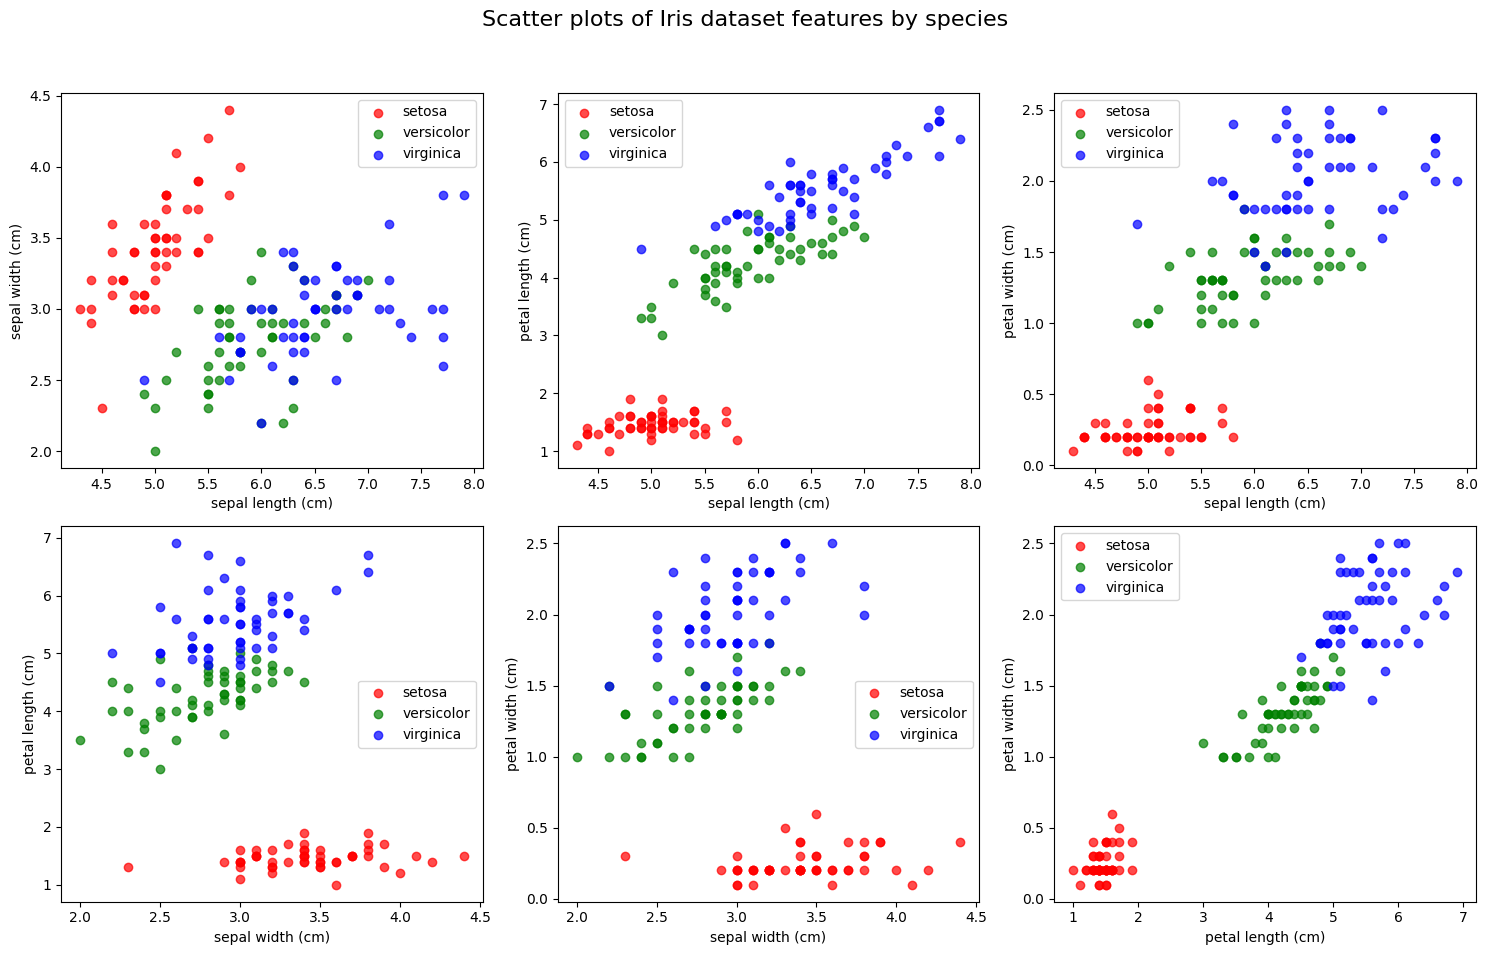

In [4]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Преобразование числовых меток в имена видов
df['species'] = df['species'].map({i: species for i, species in enumerate(iris.target_names)})

# Вычисление корреляций для всех данных, исключая столбец 'species'
correlation_all = df.drop(columns='species').corr()

# Вычисление корреляций по каждому виду, исключая столбец 'species'
correlation_by_species = df.groupby('species').apply(lambda x: x.drop(columns='species').corr())

# Альтернативная визуализация распределений для каждой пары переменных
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Scatter plots of Iris dataset features by species", fontsize=16)


feature_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
species_names = df['species'].unique()
colors = ["r", "g", "b"]

for i, (feat_x, feat_y) in enumerate(feature_pairs):
    ax = axes[i // 3, i % 3]
    for color, species in zip(colors, species_names):
        subset = df[df['species'] == species]
        ax.scatter(subset.iloc[:, feat_x], subset.iloc[:, feat_y], label=species, alpha=0.7, color=color)
    ax.set_xlabel(df.columns[feat_x])
    ax.set_ylabel(df.columns[feat_y])
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

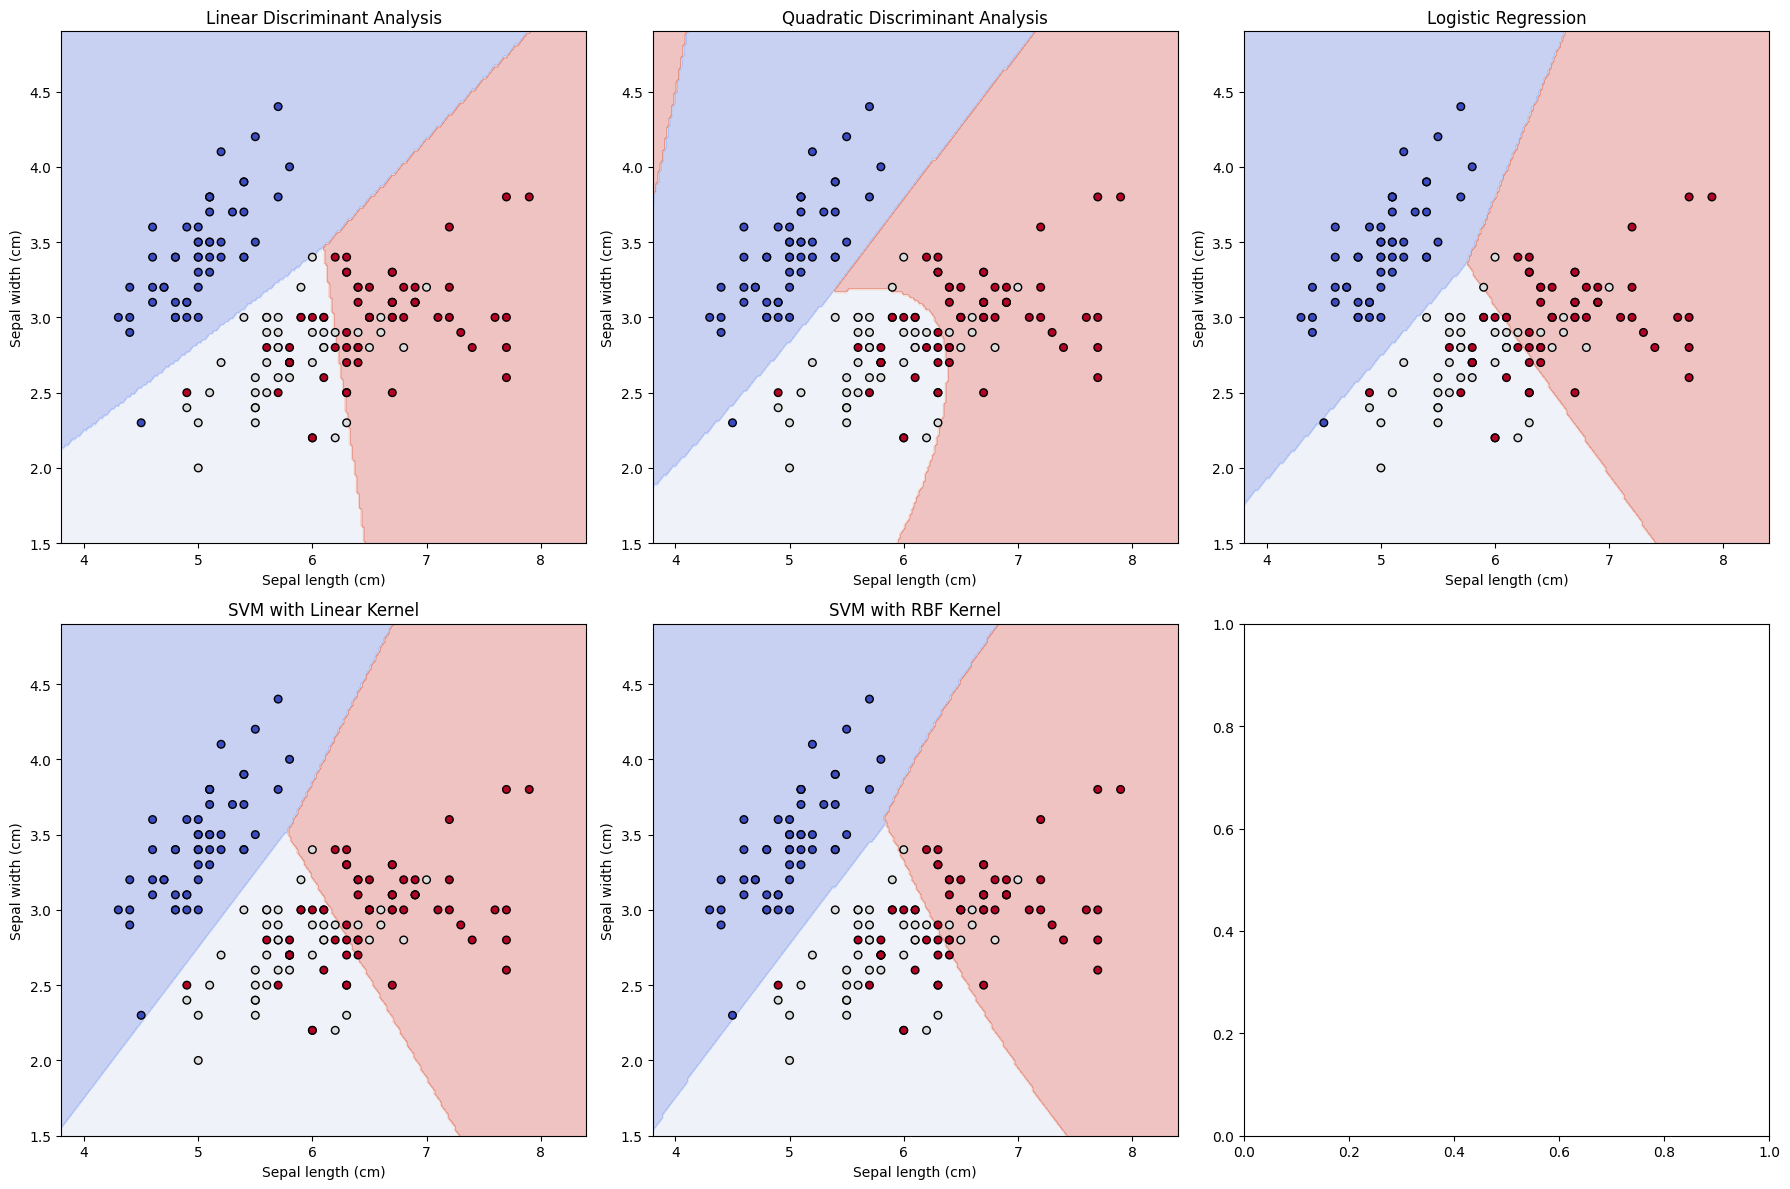

In [5]:
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

df_selected = df[['sepal length (cm)', 'sepal width (cm)', 'species']]
X = df_selected[['sepal length (cm)', 'sepal width (cm)']].values
y = df_selected['species']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
log_reg = LogisticRegression()
svm_linear = SVC(kernel='linear', probability=True)
svm_rbf = SVC(kernel='rbf', probability=True)

lda.fit(X_train, y_train)
qda.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Определение сетки для построения графиков
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

models = [lda, qda, log_reg, svm_linear, svm_rbf]
titles = [
    "Linear Discriminant Analysis",
    "Quadratic Discriminant Analysis",
    "Logistic Regression",
    "SVM with Linear Kernel",
    "SVM with RBF Kernel"
]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, (model, title) in enumerate(zip(models, titles)):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax = axes[idx]
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', cmap=plt.cm.coolwarm)
    ax.set_title(title)
    ax.set_xlabel("Sepal length (cm)")
    ax.set_ylabel("Sepal width (cm)")

plt.tight_layout()
plt.show()


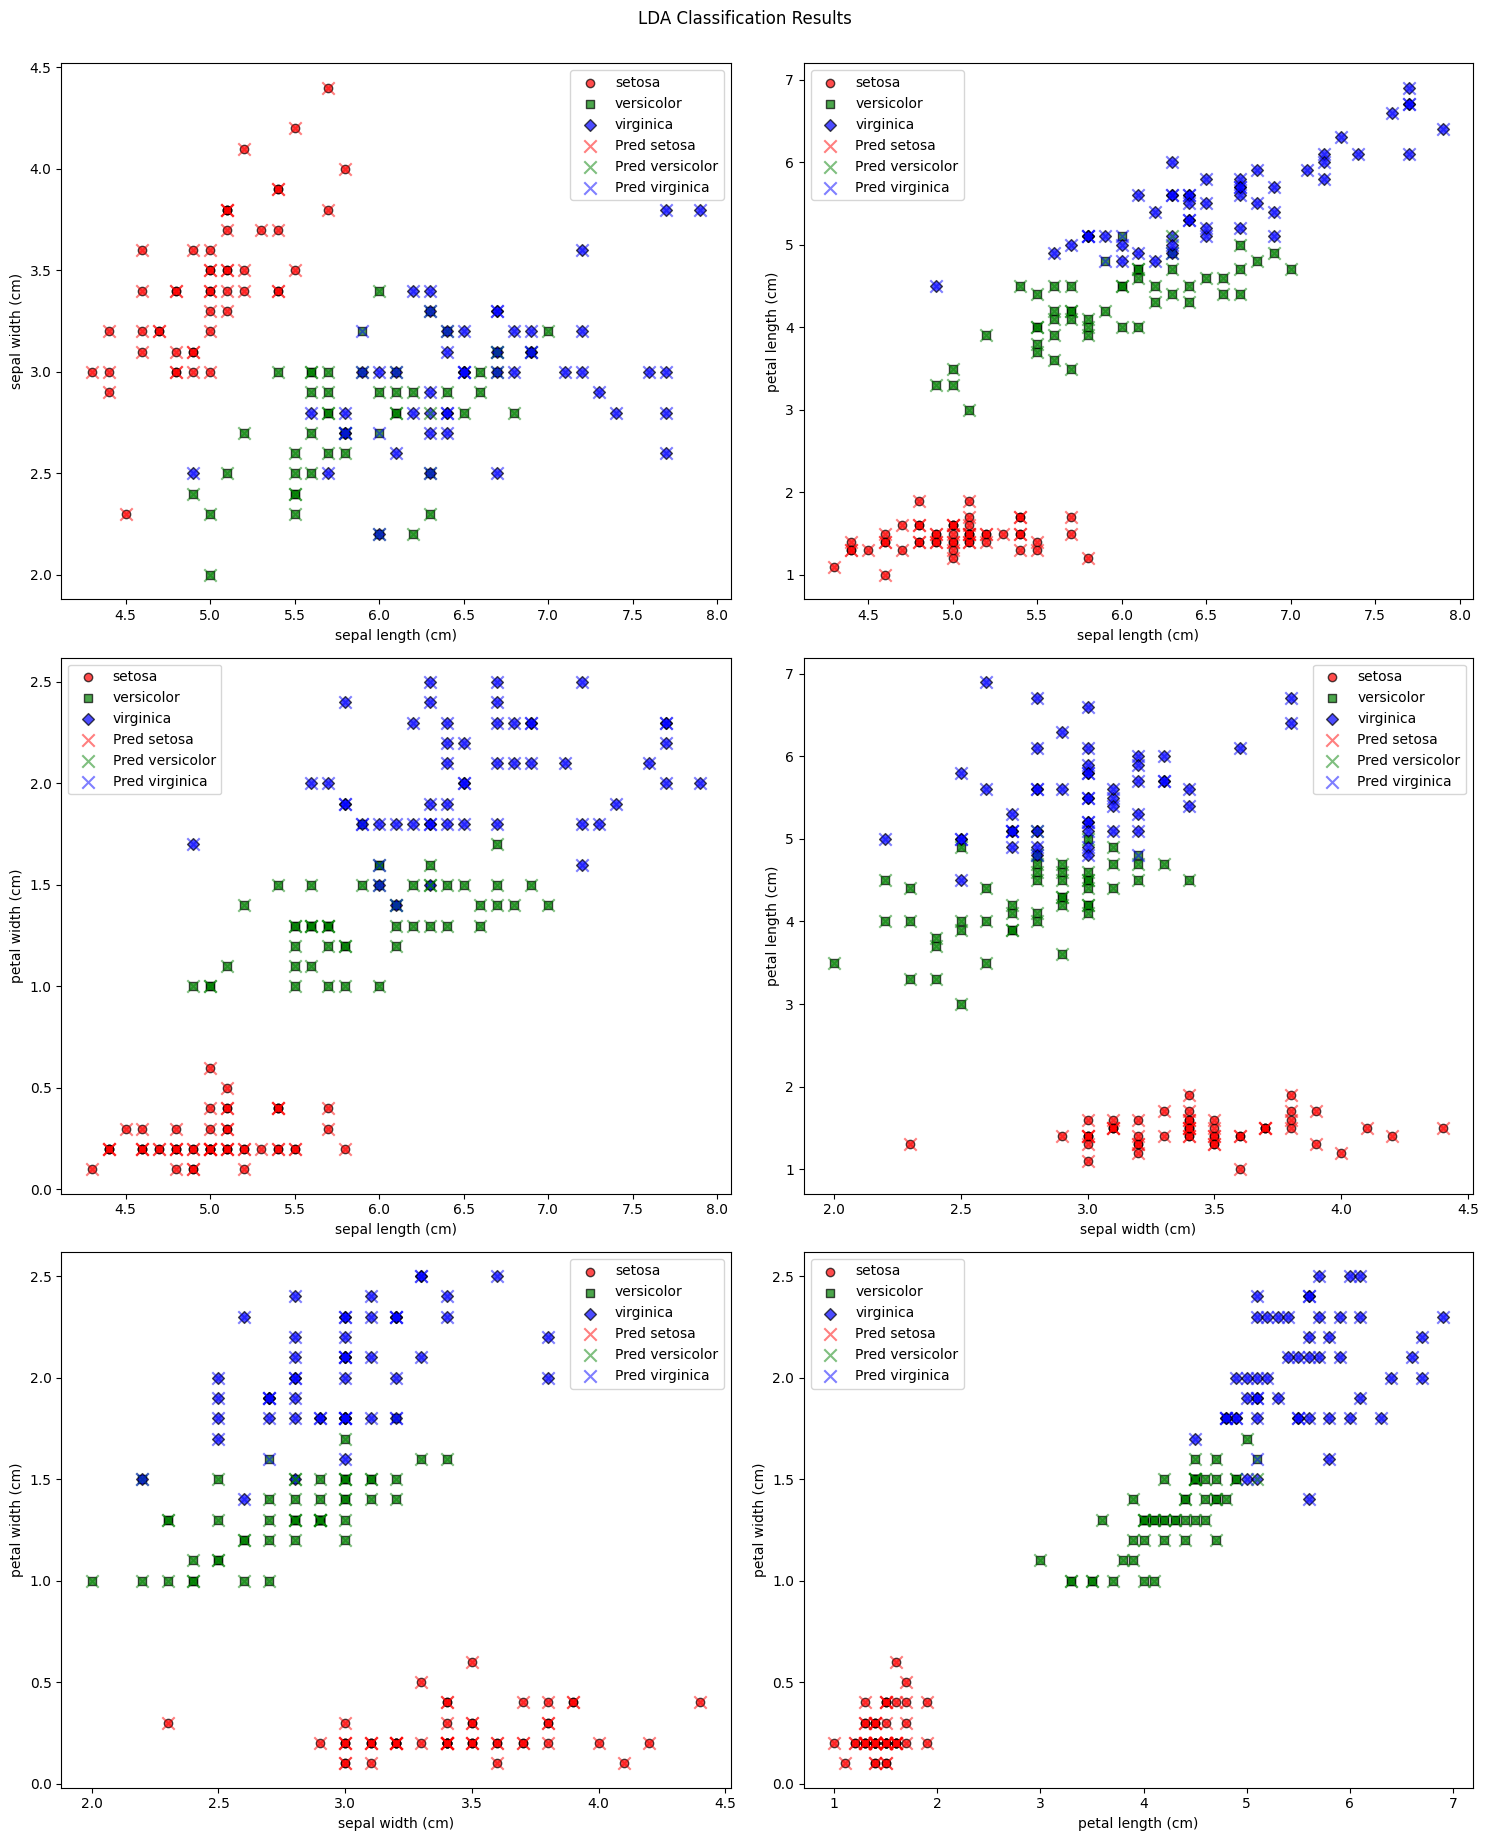

In [9]:
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

X = df.drop(columns='species').values
y = df['species']

lda = LinearDiscriminantAnalysis()
y_pred = lda.fit(X, y).predict(X)

df['lda_pred'] = y_pred

feature_names = iris.feature_names
feature_pairs = [(i, j) for i in range(len(feature_names)) for j in range(i + 1, len(feature_names))]
species_names = iris.target_names
colors = ["r", "g", "b"]
markers = ["o", "s", "D"]

fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.flatten()

# Построение графиков для каждой пары признаков
for idx, (feat_x, feat_y) in enumerate(feature_pairs):
    ax = axes[idx]
    for color, marker, species in zip(colors, markers, range(3)):
        subset = df[df['species'] == species]
        ax.scatter(subset.iloc[:, feat_x], subset.iloc[:, feat_y], color=color, marker=marker, 
                   label=species_names[species], alpha=0.7, edgecolor='k')
    
    # Выделение предсказанных классов (LDA) цветом маркера
    for color, species in zip(colors, range(3)):
        pred_subset = df[df['lda_pred'] == species]
        ax.scatter(pred_subset.iloc[:, feat_x], pred_subset.iloc[:, feat_y], color=color, 
                   marker='x', s=80, alpha=0.5, label=f'Pred {species_names[species]}')
    
    ax.set_xlabel(feature_names[feat_x])
    ax.set_ylabel(feature_names[feat_y])
    ax.legend()

plt.tight_layout()
plt.suptitle("LDA Classification Results", y=1.02)
plt.show()


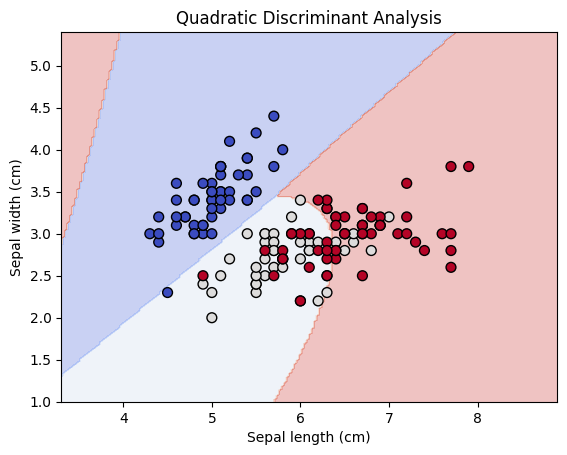

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

df_selected = df[['sepal length (cm)', 'sepal width (cm)', 'species']]
X = df_selected[['sepal length (cm)', 'sepal width (cm)']].values
y = df_selected['species'].values

class_labels = np.unique(y)
means = {}
covariances = {}
priors = {}

for label in class_labels:
    X_class = X[y == label]
    means[label] = X_class.mean(axis=0)  # Вектор средних значений
    covariances[label] = np.cov(X_class, rowvar=False)  # Ковариационная матрица
    priors[label] = X_class.shape[0] / X.shape[0]  # Приоритет класса

# Функция для расчета квадратичной дискриминантной оценки
def qda_score(x, mean, cov, prior):
    cov_inv = np.linalg.inv(cov)
    diff = x - mean
    return -0.5 * np.dot(diff.T, np.dot(cov_inv, diff)) - 0.5 * np.log(np.linalg.det(cov)) + np.log(prior)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Предсказание класса для каждой точки сетки
Z = np.zeros_like(xx, dtype=int)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        x_point = np.array([xx[i, j], yy[i, j]])
        scores = [qda_score(x_point, means[label], covariances[label], priors[label]) for label in class_labels]
        Z[i, j] = np.argmax(scores)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=50)
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Quadratic Discriminant Analysis")
plt.show()
